# Принятие решения в бизнесе с помощью проверки статистических гипотез

**Описание проекта**

Аналитику крупного интернет-магазина вместе с отделом маркетинга необходимо подготовить список гипотез для увеличения выручки. Приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.


**Часть 1. Приоритизация гипотез**

В файле */datasets/hypothesis.csv* 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами **Reach, Impact, Confidence, Effort.**

**Задача**

- Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

**Часть 2. Анализ A/B-теста** 

Вы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv**

**Задача:**

**Проанализируйте A/B-тест:**

- Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
- Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
- Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
- Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.
- Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.
- Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
- Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
- Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
- Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
- Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

**Примите решение по результатам теста и объясните его. Варианты решений:**

- Остановить тест, зафиксировать победу одной из групп.
- Остановить тест, зафиксировать отсутствие различий между группами.
- Продолжить тест.

**Описание данных** 

Данные для первой части
- Файл /datasets/hypothesis.csv. Скачать датасет
- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Данные для второй части

Файл /datasets/orders.csv. Скачать датасет
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

Файл /datasets/visitors.csv. Скачать датасет
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

## Шаг. Загрузим данные и подготовим их к анализу

Путь к файлам:
- '/datasets/hypothesis.csv'
- '/datasets/orders.csv'
- '/datasets/visitors.csv'

In [1]:
# импортируем нужные библиотеки
from pymystem3 import Mystem
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from IPython.display import display

import scipy.stats as stats
import datetime as dt

In [2]:
# загрузим данные
hypothesis, orders, visitors = (
    pd.read_csv('/datasets/hypothesis.csv'),  # журнал гипотез
    pd.read_csv('/datasets/orders.csv'),  # журнал заказов
    pd.read_csv('/datasets/visitors.csv')  # журнал посетителей
)

###  Изучим и подготовим к анализу данные о гипотезах  (hypothesis)

In [3]:
# изучим информацию о гипотезах
hypothesis.info()
hypothesis.head(9)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


Данные корректные, целостные, типы правильные, дубликатов нет - таблица готова к анализу.

###  Изучим и подготовим к анализу данные о заказах (orders)

In [4]:
# изучим информацию о заказах
orders.info()
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [5]:
# поменяем тип столбца "date" на datetime
orders["date"] = orders["date"].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [6]:
orders.describe()

,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1.197000e+03
mean,2.155621e+09,2.165960e+09,8.348006e+03
std,1.229085e+09,1.236014e+09,3.919113e+04
min,1.062393e+06,5.114589e+06,5.000000e+01
25%,1.166776e+09,1.111826e+09,1.220000e+03
50%,2.145194e+09,2.217985e+09,2.978000e+03
75%,3.237740e+09,3.177606e+09,8.290000e+03
max,4.293856e+09,4.283872e+09,1.294500e+06


In [7]:
# проверим дубликаты
print("Кол-во дубликатов =", orders.duplicated().sum())

Кол-во дубликатов = 0


В процессе предобработки изменен тип столбца "date" на datetime. Данные корректные, целостные, типы правильные, дубликатов нет - таблица готова к анализу.

###  Изучим и подготовим к анализу данные о посетителях (visitors)

In [8]:
# изучим информацию о посетителях
visitors.info()
visitors.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [9]:
# поменяем тип столбца "visitors" на datetime
visitors["date"] = visitors["date"].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [10]:
visitors.describe()

,visitors
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


In [11]:
# проверим дубликаты
print("Кол-во дубликатов =",visitors.duplicated().sum())

Кол-во дубликатов = 0


В процессе предобработки изменен тип столбца "date" на datetime. Данные корректные, целостные, типы правильные, дубликатов нет - таблица готова к анализу.

## Шаг.  Приоритизация гипотез

- Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

In [12]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [13]:
# применим фреймворк ICE для приоритизации гипотез, значение округлим до десятых
hypothesis['ICE'] = ((hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']).round(1)

In [14]:
# отсортируем по убыванию приоритета
display(hypothesis[['ICE', 'Hypothesis']].sort_values(by='ICE', ascending=False))

,ICE,Hypothesis
8,16.2,"Запустить акцию, дающую скидку на товар в день..."
0,13.3,"Добавить два новых канала привлечения трафика,..."
7,11.2,Добавить форму подписки на все основные страни...
6,8.0,Показать на главной странице баннеры с актуаль...
2,7.0,Добавить блоки рекомендаций товаров на сайт ин...
1,2.0,"Запустить собственную службу доставки, что сок..."
5,1.3,"Добавить страницу отзывов клиентов о магазине,..."
3,1.1,"Изменить структура категорий, что увеличит кон..."
4,1.0,"Изменить цвет фона главной страницы, чтобы уве..."


In [15]:
# применим фреймворк RICE для приоритизации гипотез
hypothesis['RICE'] = (hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']

In [16]:
# отсортируем по убыванию приоритета
display(hypothesis[['RICE', 'Hypothesis', 'Reach']].sort_values(by='RICE', ascending=False))

,RICE,Hypothesis,Reach
7,112.0,Добавить форму подписки на все основные страни...,10
2,56.0,Добавить блоки рекомендаций товаров на сайт ин...,8
0,40.0,"Добавить два новых канала привлечения трафика,...",3
6,40.0,Показать на главной странице баннеры с актуаль...,5
8,16.2,"Запустить акцию, дающую скидку на товар в день...",1
3,9.0,"Изменить структура категорий, что увеличит кон...",8
1,4.0,"Запустить собственную службу доставки, что сок...",2
5,4.0,"Добавить страницу отзывов клиентов о магазине,...",3
4,3.0,"Изменить цвет фона главной страницы, чтобы уве...",3


**Вывод**

Наиболее перспективные гипотезы по ICE - это гипотезы с индексами №8, №0, №7 , а в RICE - №7(была на 3 месте в ICE), №2(была на 5 месте в ICE), №0(на 2 месте в ICE). Лидер таблицы ICE - №8 сместился на пятую позицию в RICE, в то время как №2 перешел на второе место в RICE с пятого в ICE. Такое отличие продиктовано, тем что в фреймворке RICE учитывается важный параметр - Reach (скольких пользователей затронет изменение, которое хотим внести). В гипотезах №7 и №2, этот параметр довольно высок (в №7 Reach равен максимальному значению 10, а в №2 равен 8, тоже высокий, а в лидере ICE - в №8 Reach равен минимальному значению 1). Следовательно, для тестирования необходимо выбрать гипотезу №7 и возможно еще №2.

## Шаг. Анализ A/B-теста

### График кумулятивной выручки

In [17]:
# посмотрим информацию о заказах
orders.head(3)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A


In [18]:
# рассчитаем медианную выручку за день в каждой группе, чтобы иметь представление сколько выручка за день
orders.groupby(['date','group'])['revenue'].sum().groupby('group').median()

group
A    112473
B    147274
Name: revenue, dtype: int64

In [19]:
# посмотрим информацию о посетителях
visitors.head(3)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507


In [20]:
# cравним идентичны ли даты и группы в таблицах посетителей и заказов для безпроблемного объединения данных 
orders[['date','group']].drop_duplicates().sort_values(by=['date','group']).reset_index(drop=True)

,date,group
0,2019-08-01,A
1,2019-08-01,B
2,2019-08-02,A
3,2019-08-02,B
4,2019-08-03,A
...,...,...
57,2019-08-29,B
58,2019-08-30,A
59,2019-08-30,B
60,2019-08-31,A


In [21]:
contrast = orders[['date','group']].drop_duplicates().sort_values(by=['date','group']).reset_index(drop=True) == visitors[['date','group']].drop_duplicates().sort_values(by=['date','group']).reset_index(drop=True)

In [22]:
display(contrast)

,date,group
0,True,True
1,True,True
2,True,True
3,True,True
4,True,True
...,...,...
57,True,True
58,True,True
59,True,True
60,True,True


Все пары дата-группа в таблицах посетители и заказы совпадают, можно проводить объдинение.

Cоздадим таблицу **cumulativeData** куммулятивных данных по обеим таблицам.

In [23]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates() 

In [24]:
# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].
                                     agg({'date' : 'max', 
                                          'group' : 'max', 
                                          'transactionId' : 'nunique',
                                          'visitorId' : 'nunique', 
                                          'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].
                                       agg({'date' : 'max', 
                                            'group' : 'max', 
                                            'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])


In [25]:
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [26]:
display(cumulativeData.head(5)) 

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


Построим графики кумулятивной выручки по дням по группам.

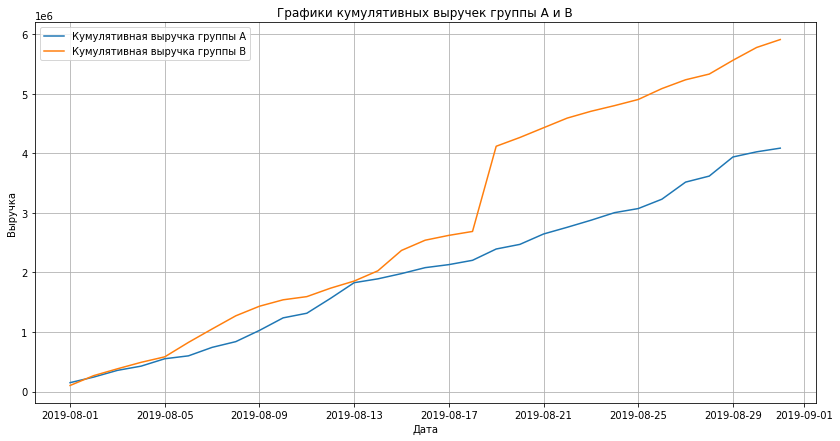

In [27]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# строим график выручки группы А и B
plt.figure(figsize=(14,7))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='Кумулятивная выручка группы A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='Кумулятивная выручка группы B')
plt.title('Графики кумулятивных выручек группы А и В')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.grid()
plt.legend();

https://slemeshevsky.github.io/python-course/visual/html/._visual-flatly002.html
    
https://python-scripts.com/plot-with-pandas

https://pythobyte.com/introduction-to-data-visualization-in-python-with-pandas-9f8fe4ec/

**Вывод**

В первой половине месяца видно, что выручка в группе "B" растёт чуть быстрее, чем в "A". 13 августа выручки примерно равны. Во  второй половине месяца очивидно, что выручка в группе "B" однозначно существенно больше. Надо отметить сильный всплеск выручки в группе "B" произошел 19 августа, скорее всего это были крупные заказы. По графикам можно предположить, что после всплеска 19.08.2019г в группе "В", выручки росли примерно одинаково.

### График кумулятивного среднего чека

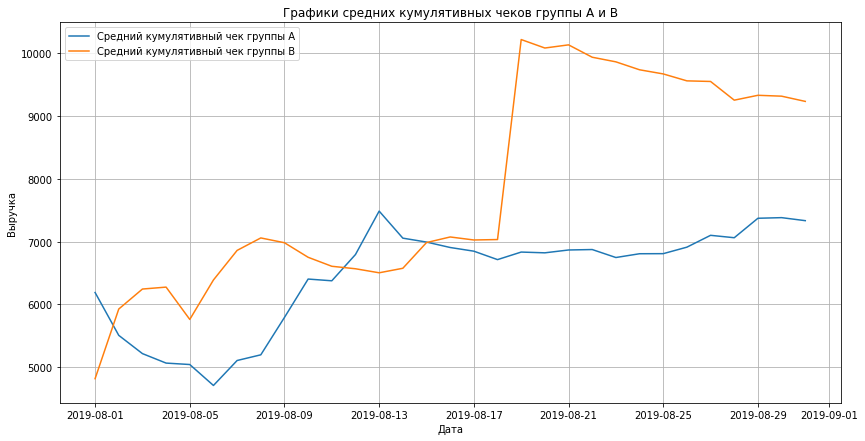

In [28]:
# построим и проанализируем графики среднего кумулятивного чека по группам(разделим кумулятивную выручку на кумулятивное число заказов):
plt.figure(figsize=(14,7))
plt.grid()
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='Средний кумулятивный чек группы A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='Средний кумулятивный чек группы B')
plt.title('Графики средних кумулятивных чеков группы А и В')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.legend();

**Вывод**

В первой половине месяца в группе "B" чек преимущественно больше, но есть даты, где, и наоборот, чек больше в группе "A" — это начало месяца 1 августа и 12-14 августа. Далее чек группы "B" стабильно больше. На графике видно сильное влияние на средний чек крупного заказа, после этого заказа (19 августа) средний чек в группе "B" постепенно стал снижаться, в то время как в группе "A" средний чек с 18 августа постепенно растет.

### График относительного изменения кумулятивного среднего чека

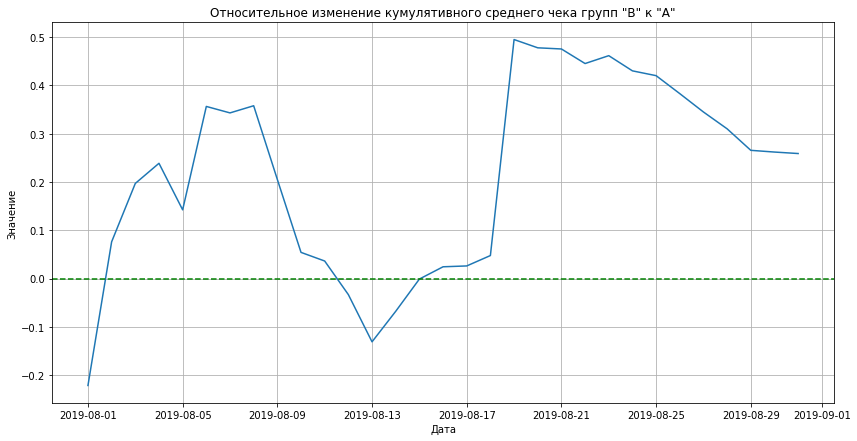

In [29]:
# cобирем данные в одном датафрейме и построим график относительного изменения кумулятивного среднего чека групп
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(14,7))
plt.grid()
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/ \
         (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.title('Относительное изменение кумулятивного среднего чека групп "B" к "А"')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.axhline(y=0, color='green', linestyle='--') ;

**Вывод**

Средний чек группы "B" рос с 1 августа, 2 августа уже превысил средний чек группы "A" и рос до 7 августа. Но 7-8 августа пошло обратное движение до 13 августа, причем 3 дня с 12 по 14 августа средний чек группы "A" был больше среднего чека группы "B". Но с 13 августа средний чек группы "B" опять начал расти и уже 15 августа наступил переломный момент. На следующий день средний чек группы "B" оказался больше и находился больше среднего чека группы "A" до конца месяца. Хорошо видно, что 19 августа был сильный рост за счет аномального заказа с большим объемом, в последующие дни средний чек группы "B" также постепенно снижался.

### График кумулятивной конверсии

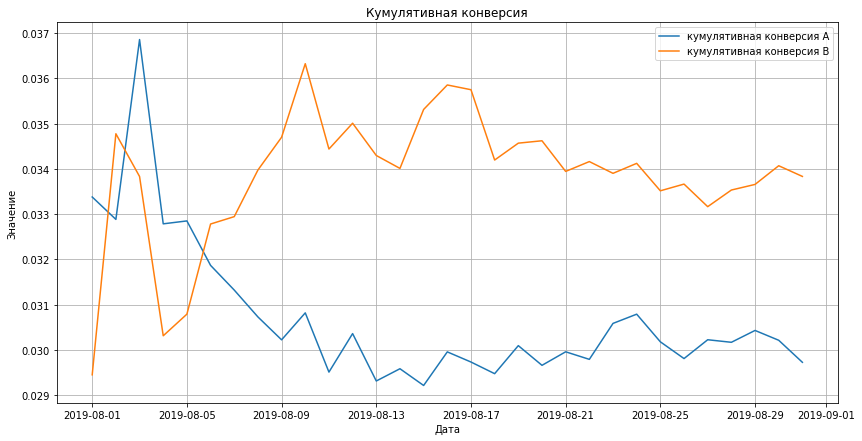

In [30]:
# построим и проанализируем график кумулятивной конверсии

# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группам А и  B
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(14,7))
plt.grid()
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='кумулятивная конверсия A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='кумулятивная конверсия B')
plt.title('Кумулятивная конверсия')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.legend();

**Вывод** 

С начала месяца конверсия (1-5 августа) сегмента "A" была значительно больше, даже 3 августа она была максимальной за весь период наблюдения между группами (исключение 2 августа). После пика конверсия сегмента "А" стала сильно падать, а начиная с 9 августа стагнировала в минимальном диапазоне 0,029-0,031. Конверсия группы "B" с 4 августа пошла расти и уже 6 августа превысила конверсию группы "A" и росла до 10 августа чуть выше 0,036. В дальнейшем пошло постепенное снижение, с всплеском роста конверсии 15-17 августа до чуть ниже 0,036. Можно сделать общий вывод - начиная с 6 августа конверсия сегмента "B" в целом значительно больше конверсии сегмента "A".

### График относительного изменения кумулятивной конверсии

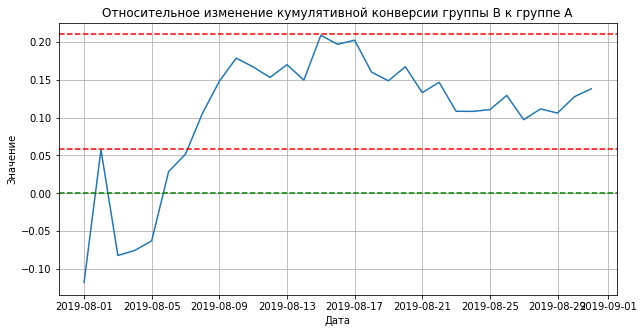

In [31]:
# постром и проанализируем график относительного изменения кумулятивной конверсии группы B к группе A
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(10,5))
plt.grid()
plt.plot(mergedCumulativeConversions['date'], 
         mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, 
         label="Относительный прирост конверсии группы B относительно группы A")

plt.title('Относительное изменение кумулятивной конверсии группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Значение')

plt.axhline(y=0, color='green', linestyle='--') 
plt.axhline(y=0.21, color='red', linestyle='--')
plt.axhline(y=0.058, color='red', linestyle='--');

**Вывод**

В начале месяца (01.09 по 05.09) конверсия сегмента "A" была больше на 5-10%. Исключение составляет 02.09., в этот день был сильный рост конверсии в группе "B" и по итогу дня результат сегмента "B" был на 5% больше сегмента "A". Скорее всего это связано с проведением маркетинговых акций, т.к. из пункта 3.4. виден рост конверсий обеих групп. Начиная с 6 августа группа "B" лидировала до конца периода. Её конверсия росла до 15.09., и разница с конверсией группы "A" на максимуме составляла 21%, затем пошло постепенное снижение относительной конверсии.


### График количества заказов по пользователям

In [32]:
# изучим данные о заказах еще раз 
orders.head(3)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A


In [33]:
# сгруппирует заказы по пользователям и подсчитает число уникальных заказов по сгруппированным данным
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorId', as_index=False).agg({'transactionId':'nunique'})

# создадим датафрейме с двумя стобцами 
ordersByUsers.columns = ['user_id','orders']

# отсортирует датафрейм по значению в столбце, выведем 10 значений 
ordersByUsers.sort_values(by='orders',ascending=False).head(10)

,user_id,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


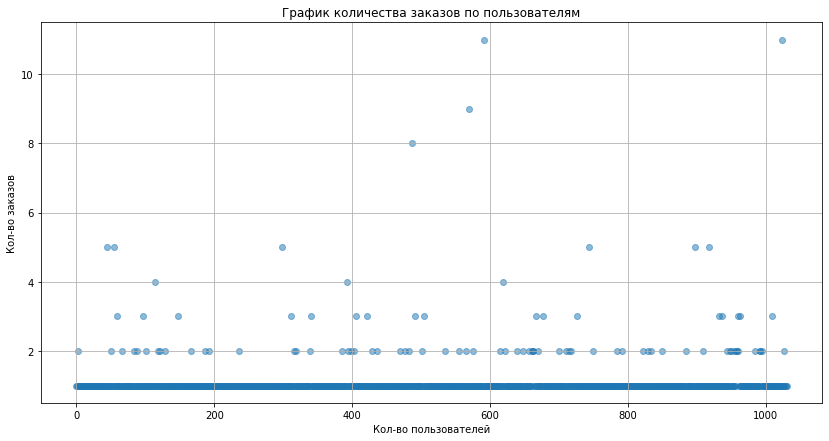

In [34]:
# построим точечную диаграмму количества заказов по пользователям
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.figure(figsize=(14,7))
plt.grid()
plt.title('График количества заказов по пользователям')
plt.xlabel('Кол-во пользователей')
plt.ylabel('Кол-во заказов')
plt.scatter(x_values, ordersByUsers['orders'], alpha=0.5);

**Вывод**

На точечной диаграмме видно, что больше всего пользователей, которые совершили 1 заказ. Тех, кто совершил 2 или 3 заказа уже не так много. Необходимо посчитать перцентили (95 и 99). А все что выше 3 заказов - явно уже аномалия.

### Граница заказов для определения аномальных пользователей

In [35]:
# для подсчёта перцентилей применяют метод percentile()
print('95 и 99 перцентили по заказам:', np.percentile(ordersByUsers['orders'], [95, 99])) 

95 и 99 перцентили по заказам: [2. 4.]


In [36]:
# для большей точности рассчитаем все перцентили с 95 по 99
print('перцентили c 95 по 99 по заказам:', np.percentile(ordersByUsers['orders'], [95,96,97,98,99])) 

перцентили c 95 по 99 по заказам: [2. 2. 2. 3. 4.]


**Вывод**
    
Большинство пользователей (98%) оформляют 1 или 2 заказа. Всё, что выше можно считать аномалия.

### График стоимостей заказов

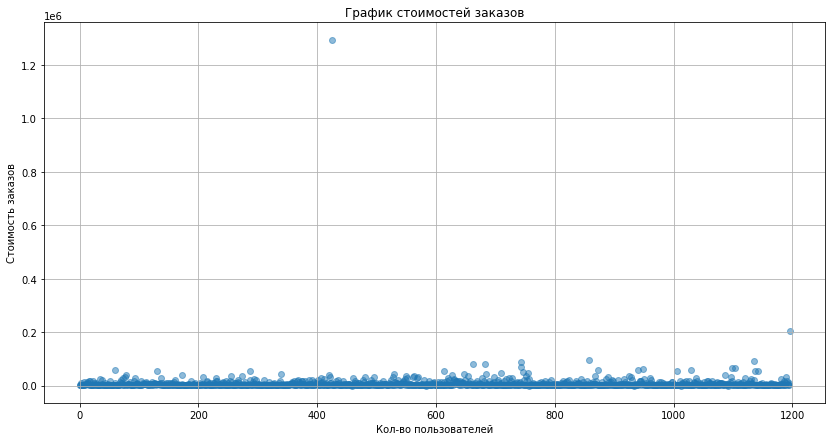

In [37]:
# построим и проанализируем точечный график стоимости заказов 
x_values = pd.Series(range(0,len(orders['revenue'])))

plt.figure(figsize=(14,7))
plt.grid()
plt.title('График стоимостей заказов')
plt.xlabel('Кол-во пользователей')
plt.ylabel('Стоимость заказов')
plt.scatter(x_values, orders['revenue'], alpha=0.5);

Заказов стоимостью 200 000 рублей не очень много. Есть выбросы в районе 200 000 - 1 250 000 рублей. Построим более наглядный график, для это уберем явные выбросы с 'revenue' больше 200 000 рублей.

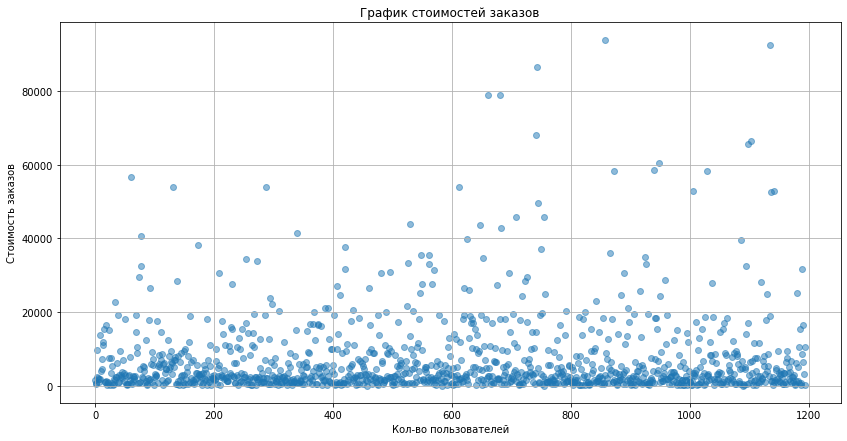

In [38]:
new_orders = orders[orders['revenue']<=200000]['revenue']
xn_values = pd.Series(range(0,len(new_orders)))
plt.figure(figsize=(14,7))
plt.grid()
plt.title('График стоимостей заказов')
plt.xlabel('Кол-во пользователей')
plt.ylabel('Стоимость заказов')
plt.scatter(xn_values, new_orders, alpha=0.5);

**Вывод**

В результате дополнительного графика можем выбрать границу аномальных заказов. Хорошо видно, что есть 2 аномальных заказ на ~1.3 млн и ~200 тысяч, остальные заказы примерно не больше 100 тысяч. Чтобы найти более точную границу аномальных заказов рассчитаем перцентили.

### Граница для определения аномальных заказов по выручке

In [39]:
# посчитаем 95-й и 99-й перцентили стоимости заказов
print('95 и 99 перцентили по выручке заказов: ', np.percentile(orders['revenue'], [95, 99])) 

95 и 99 перцентили по выручке заказов:  [28000.  58233.2]


**Вывод**

99% заказов меньше суммы 58233.2 рублей, установим её в качестве границы для аномалий.

### Различия в конверсии между группами по «сырым» данным

In [40]:
# посмотрим информацию о посетителях
visitors.head(3)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507


In [41]:
# посмотрим информацию о заказах
orders.head(3)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A


In [42]:
# cоберем все данные по заказам и визитам в одну таблицуи добавим к ним кумулятивные показатели 
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']


ordersADaily = orders[orders['group']=='A'][['date', 'transactionId', 'visitorId', 'revenue']].groupby('date', as_index=False).agg({'transactionId' : 'nunique', 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg({'date' : 'max','ordersPerDateA' : 'sum','revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersBDaily = orders[orders['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']].groupby('date', as_index=False).agg({'transactionId' : 'nunique', 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg({'date' : 'max', 'ordersPerDateB' : 'sum','revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])

ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']


In [43]:
data = ( 
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)
data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


Применим критерий и отформатируем p-value, округлив его до трёх знаков после запятой. 

В **sampleA** сохраним выборку, где каждый элемент — число заказов определённого пользователя, в том числе ноль. Значит, число элементов sampleA — это количество пользователей, сумма всех элементов — количество заказов. Чтобы получить конверсию в группе, поделим сумму заказов на число пользователей — найдём среднее в выборке **sampleA** методом mean(). 

Аналогично найдём конверсию группы B: **SampleB.mean()**.
    
Выведем относительный прирост конверсии группы "B": конверсия группы "B" / конверсия группы "A" - 1. Округлим до трёх знаков после запятой (пороговое значение возьмём равное 5%).

За нулевую гипотезу возьмём что: **"Статистически значимых различий в конверсии между группами нет"**; тогда альтернативная гипотеза будет гласить: **"Статистически значимые различия есть"**.

In [44]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : 'nunique'})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : 'nunique'})
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print('alpha =',0.05)
print('p-value = {0:.3f}'.format(stats.mannwhitneyu(sampleA, sampleB, alternative = 'two-sided')[1]))
print("Относительный показатель 'B' и 'A' = {0:.3f}".format(sampleB.mean()/sampleA.mean()-1)) 

alpha = 0.05
p-value = 0.017
Относительный показатель 'B' и 'A' = 0.138


**Вывод**

P-value = 0.017 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет - отвергаем. Это значит, что по «сырым» данным различиям в конверсии группы "A" и "B" есть. А относительный выигрыш группы "B" над "A" равен 13.8% .

### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

Чтобы рассчитать статистическую значимость различий в среднем чеке между группами, передадим критерию mannwhitneyu() данные о выручке с заказов, где пороговое значение возьмём равное 5%. И найдём относительные различия в среднем чеке между группами.

За нулевую гипотезу возьмём что: **"Статистически значимых различий в средних чеках между группами нет"**, тогда альтернативная гипотеза будет гласить: **"Статистически значимые различия есть"**.

In [45]:
print('alpha =',0.05)
print('p-value = {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'], alternative = 'two-sided')[1]))
print("Относительный показатель 'B' и 'A' = {0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

alpha = 0.05
p-value = 0.729
Относительный показатель 'B' и 'A' = 0.259


**Вывод**

P-value существенно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. То есть средние чеки по "сырым" данным схожи. И при этом, средний чек группы "B" значительно выше среднего чека группы "A" на 25,9%.

### Различия в конверсии между группами по «очищенным» данным

После проведенных исследований из пунктов 3.6-3.9, приняли за аномальных пользователей тех, кто совершил 3 и больше заказов или совершил заказ дороже 58233.2 рублей. Сделаем срезы пользователей с числом заказов больше 2 — usersWithManyOrders и пользователей, совершивших заказы дороже 58233.2 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers. Узнаем, сколько всего аномальных пользователей методом shape().

In [46]:
# делаем срезы пользователей с числом заказов > 2 (usersWithManyOrders) и 
# пользователей совершивших заказы на сумму > 58233.2 (usersWithExpensiveOrders)
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'], 
        ordersByUsersB[ordersByUsersB['orders'] > 2]['userId']
    ], 
    axis = 0
)
usersWithExpensiveOrders = orders[orders['revenue'] > 58233.2]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0)
    .drop_duplicates().sort_values()
)
print(abnormalUsers.head(5))
print("Всего аномальных пользователей =" ,len(abnormalUsers)) 

1099    148427295
18      199603092
23      237748145
37      249864742
68      457167155
dtype: int64
Всего аномальных пользователей = 31


In [47]:
# cоздадим переменные sampleAFiltered и sampleBFiltered, в которых сохраните очищенные данные о заказах — не включая аномальных пользователей
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'], 
        pd.Series(
            0, 
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders'
        )
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0, index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders'
        )
    ],
    axis=0,
) 

Применим статистический критерий Манна-Уитни к полученным выборкам.

За нулевую гипотезу возьмём что: **Cтатистически значимых различий в конверсии между группами нет"**, тогда альтернативная гипотеза будет гласить: **Статистически значимые различия есть**.

In [48]:
print('alpha =',0.05)
print('p-value = {0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered, alternative = 'two-sided')[1]))
print("Относительный показатель 'B' и 'A' = {0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

alpha = 0.05
p-value = 0.010
Относительный показатель 'B' и 'A' = 0.174


**Вывод**

P-value = 0.01 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, - отвергаем. следовательно, «очищенным» данным различия в конверсии групп "A" и "B" есть. А относительный выигрыш группы "B" над "A" равен 17,4% (выше, чем с «сырыми» данными - 13.8%) .

### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

За нулевую гипотезу возьмём что: **"Статистически значимых различий в средних чеках между группами нет"**,  тогда альтернативная гипотеза будет гласить: **Статистически значимые различия есть**.

In [49]:
print('alpha =',0.05)
print('p-value = {0:.3f}'.format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'], alternative = 'two-sided')[1]))

print("Относительный показатель 'B' и 'A' = {0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1)) 

alpha = 0.05
p-value = 0.798
Относительный показатель 'B' и 'A' = -0.020


**Вывод**

P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, тоже нет (как и с "сырыми" данными). Однако, средний чек группы "B" оказался незначительно ниже среднего чека группы "A" на 2%, в то время как по "сырым" данным, он был больше на 25,9%. Данное различие связано с аномальным заказом на 1,3 млн.

### Решение по результатам теста

Примите решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

**По результатам тестирования было выявлено:**

И по "сырым" и по "очищенным" данным различия в конверсии групп "A" и "B" существенны. По "сырым" данным относительный выигрыш сегмента "B" над "А" составляет 13,8%, а по "очищенным" - 17,4%.

Однако, по "сырым" и по "очищенным" данным различия в средних чеках групп "A" и "B" отстутствует. Несмотря на то, что средний чек группы "B" оказался ниже среднего чека группы A по "очищенным" данным на 2%, в то время как по "сырым" данным, он был больше на 25,9%. Данное различие связано с аномальным заказом на 1,3 млн. После анализа выбросов чеки сравнялись.

Результаты тестирования вполне однозначны. В итоге можно принять решение остановить тестирование и констатировать успех и победу группы "B". Группа "B" значительно эффективнее группы "A" по конверсии, хотя по среднему чеку группы примерно равны.